In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

rs_image_height = 240
rs_image_width = 424
rs_y_line_limit = 130
ignore_mask_color = 255
#### For HSV thresholding --> get_thresholded_hsv
lower_threshold = np.array([0, 75, 70], dtype="uint8")
upper_threshold = np.array([200, 175, 200], dtype="uint8")

#### For canny edge detection --> get_canny_edges
kernel_size = 15  ## Filter size for gaussian blur
threshlow = 180
threshhigh = 250

#### For region masking --> mask_region
mask_points = [(0, rs_image_height), (0, rs_y_line_limit), (rs_image_width, rs_y_line_limit),
                    (rs_image_width, rs_image_height)]
rs_mask_vertices = np.array([mask_points], dtype=np.int32)

#### For HoughLines --> get_HoughP
vote_threshold = 20  # minimum number of votes (intersections in Hough grid cell)
min_linelength = 10  # minimum number of pixels making up a line
max_linegap = 15  # maximum gap in pixels between connectable line segments
rho = 0.75
theta = np.pi / 180

ModuleNotFoundError: No module named 'numpy'

Read Image

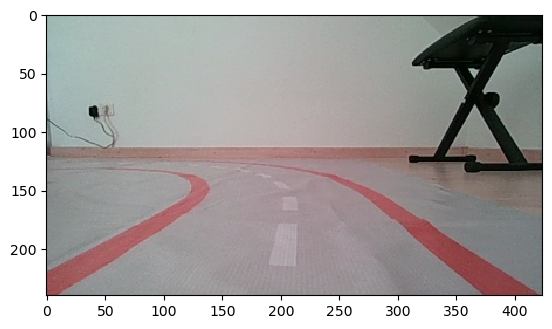

In [9]:
image = cv2.imread("good.jpeg")
#Step only necessary when the read the image form a JPEG file
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Convet to HSV space color

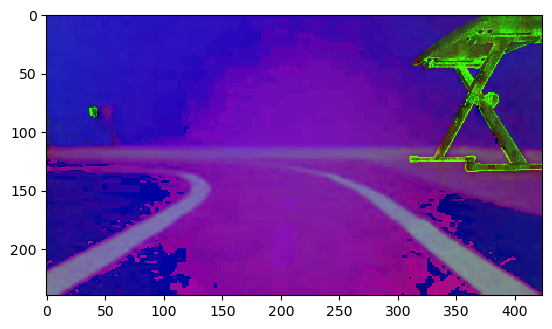

In [10]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)
plt.show()

Color Filtering

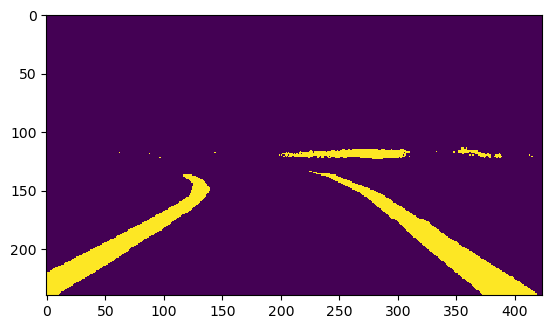

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


In [30]:
filtered_hsv = cv2.inRange(hsv_image, lower_threshold, upper_threshold)
plt.imshow(filtered_hsv)
plt.show()
print(filtered_hsv)

returns the edges dtected from canny method

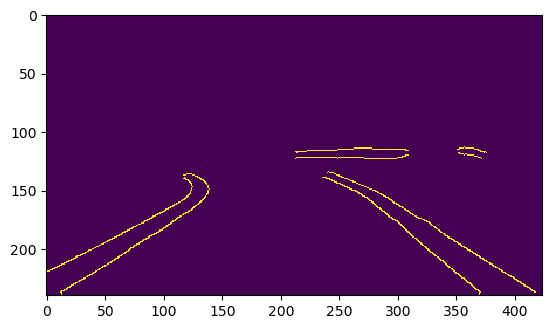

In [31]:
blur = cv2.GaussianBlur(filtered_hsv, (kernel_size, kernel_size), 0)
edges = cv2.Canny(blur, threshlow, threshhigh)
plt.imshow(edges)
plt.show()

takes canny output as input and returns edges isolated from the region of interest

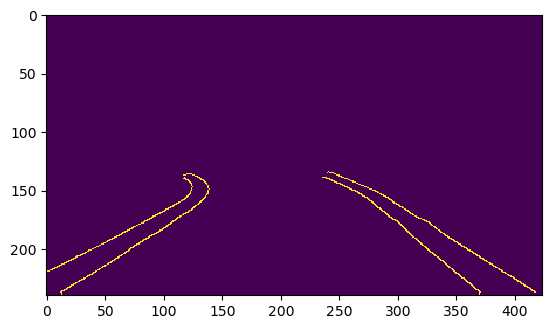

In [32]:
mask = np.zeros_like(edges)
cv2.fillPoly(mask, rs_mask_vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges)
plt.show()

Determine Lane lines

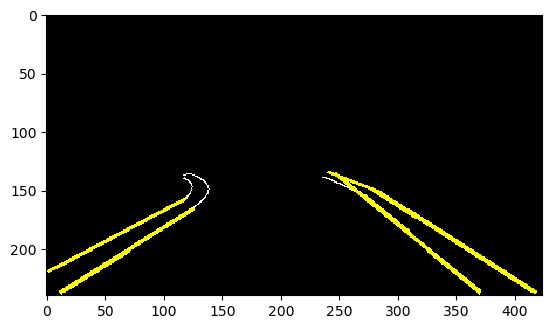

In [36]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, vote_threshold, np.array([]),min_linelength, max_linegap)
edges_with_detected_lines = np.stack((masked_edges,) * 3, axis=-1)

for line in lines:
    
    line = line[0]
    cv2.line(edges_with_detected_lines, (int(line[0]), int(line[1])), (int(line[2]), int(line[3])),(255, 255, 0), 2)

plt.imshow(edges_with_detected_lines)
plt.show()
    